Todo este pequeño estudio está basado en un trabajo publicado por el INE el año 2017, titulado "Distribución de los ingresos en Chile" y basado en la Encuesta Suplementaria de Ingresos 2010-2015. El documento [puede ser encontrado aquí](historico.ine.cl/canales/chile_estadistico/mercado_del_trabajo/nene/esi/archivos/pdf/distribucion_de_los_ingresos_en_chile.pdf).

In [1]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
library(scales)

In [3]:
library(reshape)

In [4]:
yrs <- c("2010", "2011", "2012", "2013", "2014", "2015")
avg <- c(430540, 449974, 482624, 500821, 492111, 505477)
p10 <- c(71655, 71239, 78399, 87911, 93587, 96026)
p25 <- c(168150, 184432, 202507, 219778, 210138, 220000)
p50 <- c(262734, 287255, 307997, 329667, 317155, 340000)
p75 <- c(477699, 493933, 537594, 552275, 530599, 560000)
p90 <- c(931512, 919215, 1007989, 1011767, 1029678, 1000271)

In [5]:
iqr <- p75 - p25
iqr_check = c(309549, 309501, 335087, 332497, 320461, 340000)
all.equal(iqr, iqr_check)

[1] TRUE

In [6]:
ingresos_df = data.frame(anio = yrs, 
                         media = avg,
                         p10 = p10,
                         p25 = p25,
                         p50 = p50,
                         p75 = p75,
                         p90 = p90,
                         iqr = iqr)

In [7]:
ingresos_df$spread_per <- ingresos_df$p90 - ingresos_df$p10

In [8]:
ingresos_df2 <- melt(ingresos_df[, 1:7], id = "anio")

In [9]:
comp_iqr_spread_df <- melt(ingresos_df[, c(1, 8:9)], id = "anio")

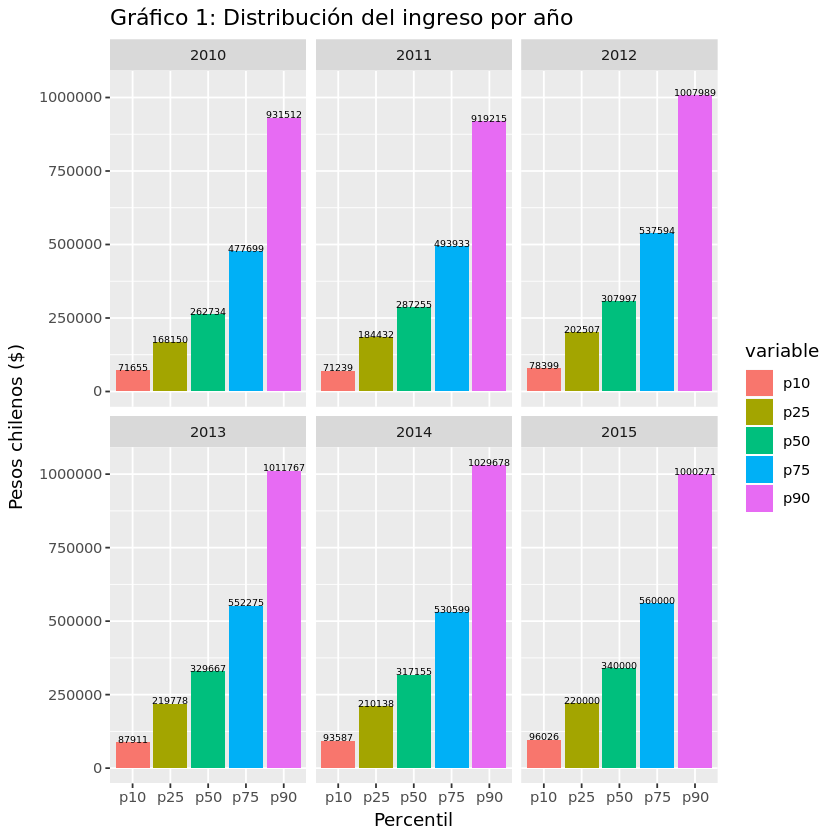

In [11]:
ggplot(data = subset(ingresos_df2, variable != "media"),
       aes(x = variable, y = value, fill = variable, label = value)) +
    geom_col() +
    facet_wrap(~ anio) +
    geom_text(nudge_y = 10000, color = "black", size = 2) +
    xlab("Percentil") + 
    ylab("Pesos chilenos ($)") +
    ggtitle("Gráfico 1: Distribución del ingreso por año")

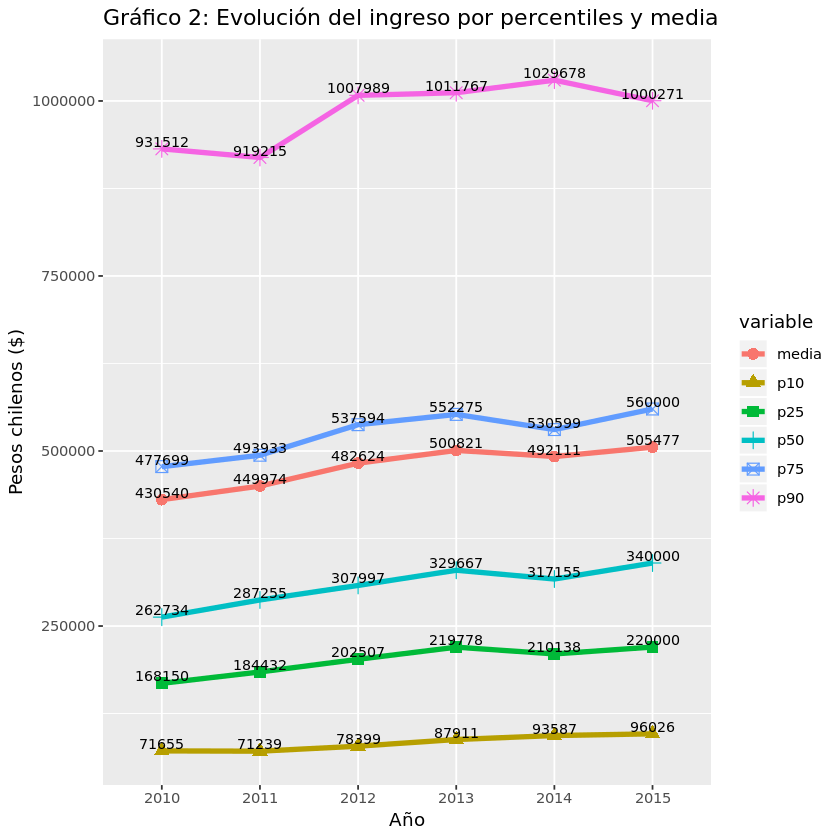

In [12]:
ggplot(data = ingresos_df2,
       aes(x = anio, y = value, group = variable, color = variable, shape = variable, label = value)) +
    geom_line(size = 1.5) +
    geom_point(size = 3, fill = "black") +
    geom_text(nudge_y = 10000, color = "black", size = 3) +
    xlab("Año") + 
    ylab("Pesos chilenos ($)") +
    ggtitle("Gráfico 2: Evolución del ingreso por percentiles y media")

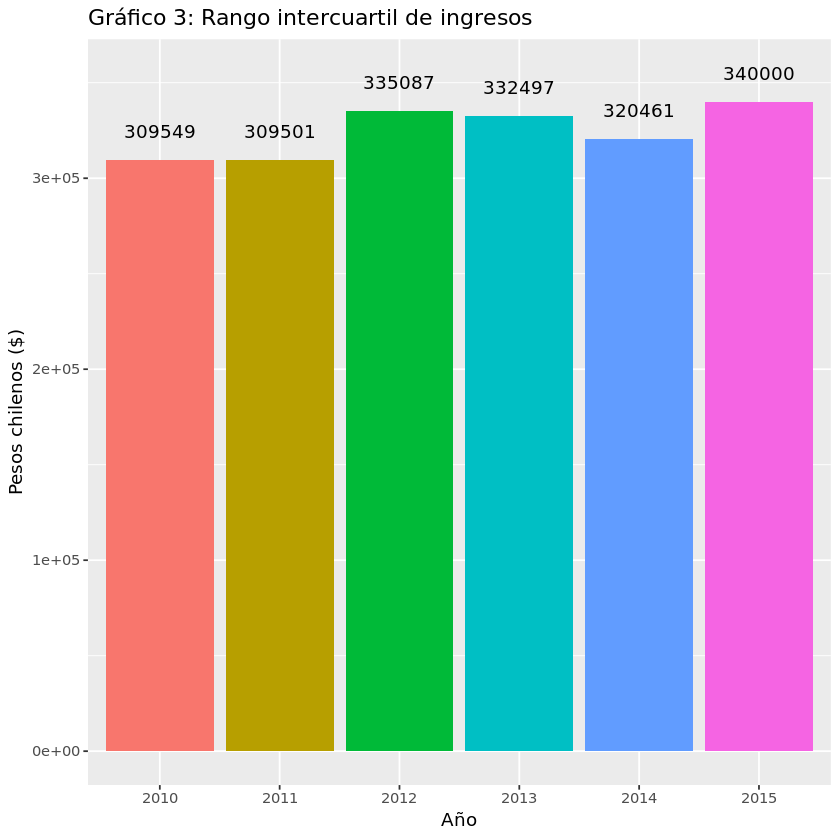

In [13]:
ggplot(data = ingresos_df,
       aes(x = anio, y = iqr, label = iqr, fill = anio)) + 
    geom_col() + 
    geom_text(nudge_y = 15000) +
    guides(fill = FALSE) +
    xlab("Año") + 
    ylab("Pesos chilenos ($)") +
    ggtitle("Gráfico 3: Rango intercuartil de ingresos")

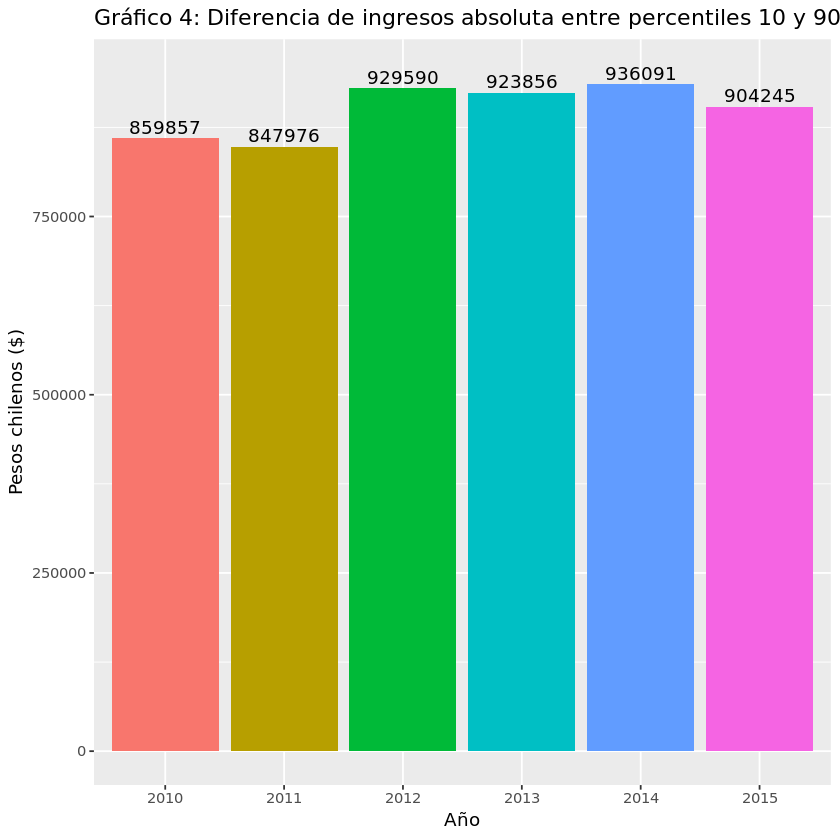

In [14]:
ggplot(data = ingresos_df,
       aes(x = anio, y = spread_per, label = spread_per, fill = anio)) + 
    geom_col() + 
    geom_text(nudge_y = 15000) +
    guides(fill = FALSE) +
    xlab("Año") + 
    ylab("Pesos chilenos ($)") +
    ggtitle("Gráfico 4: Diferencia de ingresos absoluta entre percentiles 10 y 90")

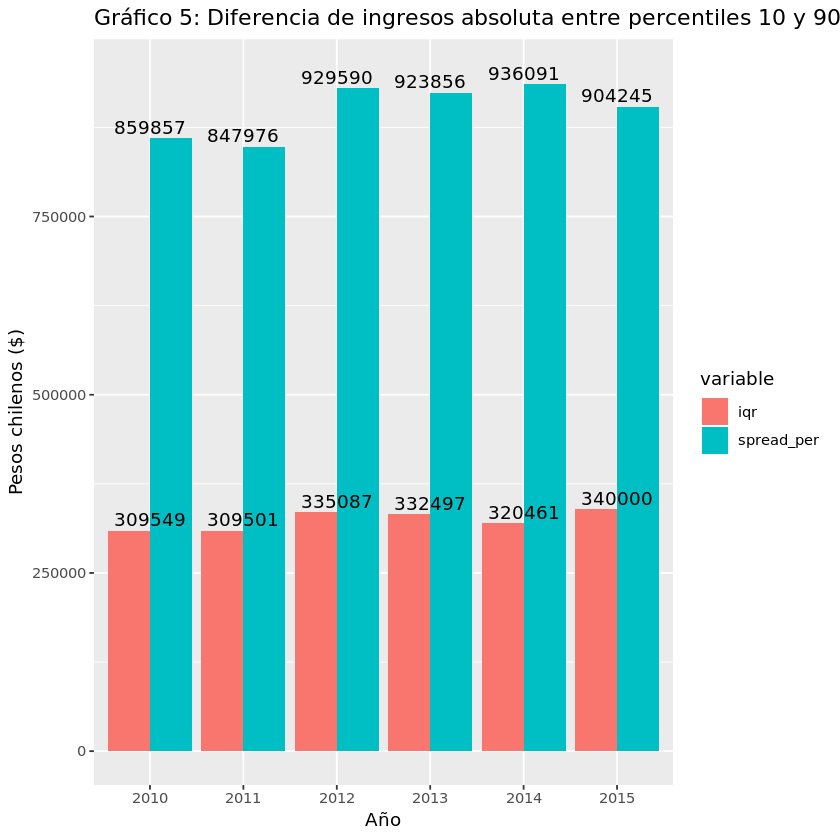

In [15]:
ggplot(data = comp_iqr_spread_df,
       aes(x = anio, y = value, fill = variable, label = value)) + 
    geom_col(position = position_dodge()) + 
    geom_text(nudge_y = 15000) +
    xlab("Año") + 
    ylab("Pesos chilenos ($)") +
    ggtitle("Gráfico 5: Diferencia de ingresos absoluta entre percentiles 10 y 90")